Η πλειοψηφία της κίνησης στο Internet είναι κρυπτογραφημένη για λόγους ασφαλείας. Έτσι, τα μηνύματα που ανταλλάσσονται γίνονται κατανοητά μόνο στον αποστολέα και τον παραλήπτη, ενώ είναι ακατανόητα για άλλες οντότητες που μπορεί να τα δουν. Στα δίκτυα υπολογιστών, το πιο συνηθισμένο πρωτόκολλο που χρησιμοποιείται για την ασφαλή μεταφορά περιεχομένου είναι το <b>HTTPS</b> (HyperText Transfer Protocol Secure). Χαρακτηριστικό παράδειγμα χρήσης αυτού του πρωτοκόλλου μπορούμε να δούμε όταν συνδεόμαστε στην υπηρεσία e-Banking της τράπεζάς μας (οι σύνδεσμοι έχουν το πρόθεμα https://, ενώ στη γραμμή διευθύνσεων εμφανίζεται ένα λουκέτο στο οποίο μπορούμε να διαβάσουμε περισσότερες πληροφορίες για την ιστοσελίδα στην οποία συνδεόμαστε).

Στα προηγούμενα εργαστήρια, είδαμε θέματα ασφαλείας που αφορούν το πρωτόκολλο DNS. Στα εργαστήρια αυτά χρησιμοποιήσαμε την παραδοσιακή μορφή του πρωτοκόλλου στην οποία τα περιεχόμενα των μηνυμάτων DNS είναι διαθέσιμα στον διαχειριστή δικτύου, π.χ. το όνομα DNS που περιλαμβάνει η ερώτηση είναι ορατό στο διαχειριστή και μπορεί να ελεχθεί αν είναι καλόβουλο ή κακόβουλο.

Αν και απαραίτητη για την αντιμετώπιση δικτυακών απειλών, η πρόσβαση στα ονόματα DNS από διαχειριστές δικτύων επιτρέπει τη συλλογή πληροφοριών για τις ιστοσελίδες που επισκέπτεται ένας χρήστης. Τέτοιες πληροφορίες μπορούν να χρησιμοποιηθούν για εμπορικούς σκοπούς, π.χ. προβολή στοχευμένων διαφημίσεων, παραβιάζοντας την ιδιωτικότητα των χρηστών. Για την εξασφάλιση της ιδιωτικότητας έχουν προταθεί νέα πρωτόκολλα, τα οποία αποκρύπτουν το περιεχόμενο των μηνυμάτων DNS από τους διαχειριστές δικτύων. Ένα τέτοιο πρωτόκολλο είναι το <b>DNS over HTTPS (DoH)</b>, το οποίο συνδυάζει τις ιδιότητες ασφαλείας του HTTPS με το πρωτόκολλο DNS. Περισσότερες λεπτομέρειες για το DoH είναι διαθέσιμες από <a href="https://en.wikipedia.org/wiki/DNS_over_HTTPS">εδώ</a>.

Στο συγκεκριμένο εργαστήριο θα χρησιμοποιήσουμε machine learning για την ανίχνευση κακόβουλης κίνησης σε μηνύματα DNS που έχουν κρυπτογραφηθεί χρησιμοποιώντας το πρωτόκολλο DNS over HTTPS (DoH). Συγκεκριμένα, θα δούμε ανίχνευση κίνησης που παράγεται από εργαλεία που χρησιμοποιούνται για <b>DNS Tunnelling</b>. Το <a href="https://www.checkpoint.com/cyber-hub/network-security/what-is-dns-tunneling/#:~:text=DNS%20tunneling%20involves%20abuse%20of,however%2C%20it%20has%20its%20limits.">DNS Tunnelling</a> βασίζεται στο πρωτόκολλο DNS για τη μεταφορά πληροφοριών στο πεδίο που κανονικά μπαίνουν τα ονόματα DNS, π.χ. τη μεταφορά τραπεζικών κωδικών. Τέτοια μηνύματα συνήθως έχουν μεγάλο μέγεθος, ώστε να μεταφέρεται όσο περισσότερη πληροφορία γίνεται σε όσο το δυνατόν λιγότερα μηνύματα DNS.

Επειδή δε θα μπορούμε να δούμε το περιεχόμενο των μηνυμάτων DNS (άρα και τα ονόματα) θα βασιστούμε σε στατιστικά που μπορούν να διαχωρίσουν την καλόβουλη από την κακόβουλη κίνηση. Παραδείγματα τέτοιων στατιστικών είναι το μέγεθος των μηνυμάτων DNS που ανταλλάσσονται, το διάστημα ανάμεσα στην αποστολή δύο μηνυμάτων, ο αριθμός των Bytes που ανταλλάσσονται, καθώς και στατιστικά ανά flows (ομάδες μηνυμάτων με παρόμοια χαρακτηριστικά, όπως αποστολέα και παραλήπτη). Θα χρησιμοποιήσουμε το dataset DoHBrw 2020, που είναι διαθέσιμο από <a href="https://www.unb.ca/cic/datasets/dohbrw-2020.html">εδώ</a>. Στην παραπάνω ιστοσελίδα αναφέρονται και τα features που θα χρησιμοποιηθούν.

Από την ιστοσελίδα του <a href="https://www.unb.ca/cic/datasets/dohbrw-2020.html">DoHBrw</a> αποκτήστε πρόσβαση στο dataset (εκεί που λέει "Download the Dataset") και κατεβάστε το αρχείο <i>Total_CSVs.zip</i>. Στη συνέχεια:
<ul>
<li> Κάντε unzip το αρχείο Total_CSVs.zip.</li>
<li> Εντοπίστε τα αρχεία l2-benign.csv και l2-malicious.csv.</li>
<li> Αφαιρέστε τα headers (πρώτη γραμμή) από το αρχείο l2-malicious.csv.</li>
<li> Ενώστε τα δύο αρχεία σε ένα κοινό αρχείο l2-total.csv (η σειρά δεν παίζει ρόλο).
</ul>

Στην άσκηση θα χρησιμοποιήσετε τη μέθοδο **SHAP** (SHapley Additive exPlanation) για να κατανοήσετε πώς δουλεύουν δυαδικοί ταξινομητές στο παραπάνω πρόβλημα, δηλαδή στην κατηγοριοποίηση κρυπτογραφημένης δικτυακής κίνησης σε καλόβουλη και κακόβουλη. Συγκεκριμένα, θα εκπαιδεύσετε ένα tree-based μοντέλο (Random Forest - RF) και ένα νευρωνικό δίκτυο (Multi-Layer Perceptron - MLP).

**ΑΣΚΗΣΗ**

Εγκαταστήστε τις απαραίτητες βιβλιοθήκες

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install xgboost
!pip3 install shap
!pip3 install matplotlib
!pip3 install imblearn
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=21b29dd0b7b6bdf7eff125b9a36983a97dcbd22d524d53e800f71d5b1a2a9c3a
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/sim

Στη συνέχεια τρέξτε το παρακάτω πρόγραμμα:

Load dataset from file:  l2-total.csv
-------------------------------
The loaded dataset is the following: 
               SourceIP    DestinationIP  SourcePort  DestinationPort  \
0        192.168.20.191  176.103.130.131       50749              443   
1        192.168.20.191  176.103.130.131       50749              443   
2        192.168.20.191  176.103.130.131       50749              443   
3        192.168.20.191  176.103.130.131       50749              443   
4       176.103.130.131   192.168.20.191         443            50749   
...                 ...              ...         ...              ...   
209837          1.1.1.1   192.168.20.212         443            43870   
209838   192.168.20.207          8.8.4.4       54100              443   
209839          8.8.4.4   192.168.20.207         443            54100   
209840          8.8.4.4   192.168.20.207         443            54100   
209841   192.168.20.207          8.8.4.4       54100              443   

               

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Correlation threshold is:  0.9
-------------------------------
Dropped features because of correlation: 
['FlowReceivedRate', 'PacketLengthStandardDeviation', 'PacketLengthCoefficientofVariation', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMedian']
-------------------------------
After correlation, the new dataframe is: 
          Duration  FlowBytesSent  FlowSentRate  FlowBytesReceived  \
0        95.081550          62311    655.342703              65358   
1       122.309318          93828    767.136973             101232   
2       120.958413          38784    320.639127              38236   
3       110.501080          61993    561.017141              69757   
4        54.229891          83641   1542.341289              76804   
...            ...            ...           ...                ...   
209837   26.848207         110217   4105.190339              46427   
209838  120.664656         141478   1

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


After joining X_test and y_test, we get: 
        Duration  FlowBytesSent  FlowSentRate  FlowBytesReceived  \
76662   0.188338       0.000219      0.000007           0.000618   
72444   0.188061       0.000219      0.000007           0.000627   
55224   0.190229       0.000662      0.000022           0.001033   
98961   0.002249       0.000125      0.000366           0.000503   
14135   0.024383       0.000037      0.000011           0.000035   
...          ...            ...           ...                ...   
177519  0.012135       0.000137      0.000074           0.000533   
63189   0.503614       0.012680      0.000158           0.025893   
13928   0.001846       0.000507      0.001745           0.000693   
120472  0.673842       0.035975      0.000335           0.007530   
203465  0.019744       0.000137      0.000046           0.000533   

        PacketLengthVariance  PacketLengthMean  PacketLengthMedian  \
76662               0.092211          0.272630            0.094017   
7

  0%|          | 0/100 [00:00<?, ?it/s]

Summary Plots for:  RandomForest


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


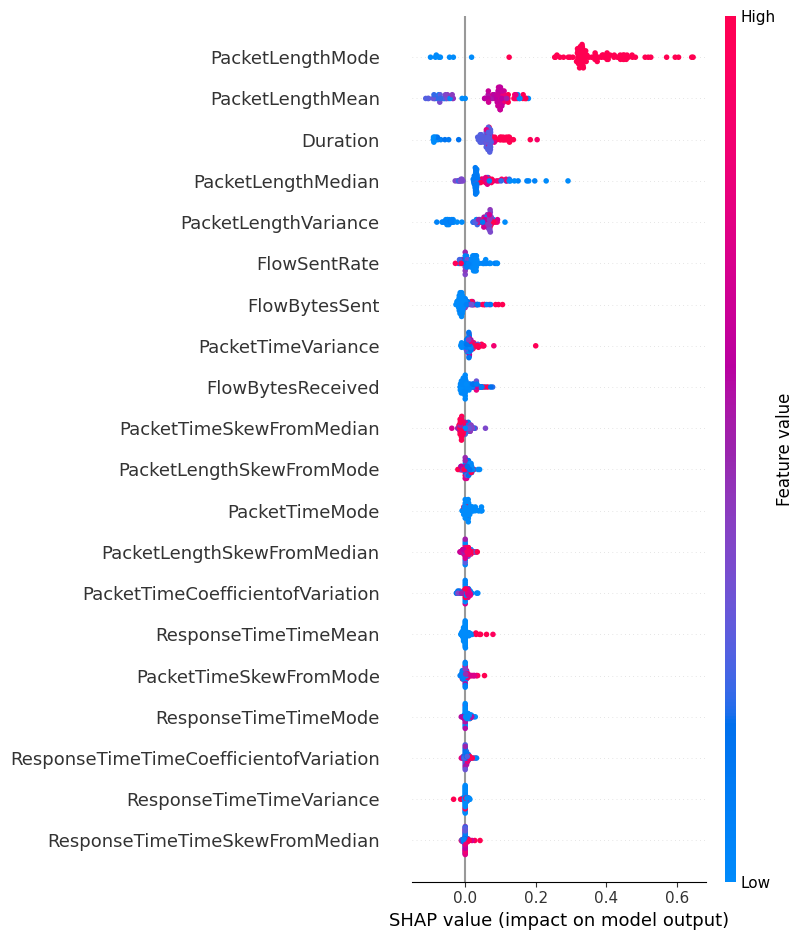

Training:  MLP
-------------------------------
Train on 242974 samples, validate on 60744 samples
Epoch 1/3
242816/242974 [============================>.] - ETA: 0s - loss: 0.1708 - acc: 0.9349

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


242974/242974 [==============================] - 6s 25us/sample - loss: 0.1708 - acc: 0.9349 - val_loss: 0.0672 - val_acc: 0.9754
Epoch 2/3
242974/242974 [==============================] - 7s 29us/sample - loss: 0.0709 - acc: 0.9758 - val_loss: 0.0695 - val_acc: 0.9758
Epoch 3/3
242974/242974 [==============================] - 6s 25us/sample - loss: 0.0550 - acc: 0.9816 - val_loss: 0.0341 - val_acc: 0.9907
Training MLP classifier
-------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2200      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                  

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


  0%|          | 0/100 [00:00<?, ?it/s]

Summary Plots for:  MLP


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


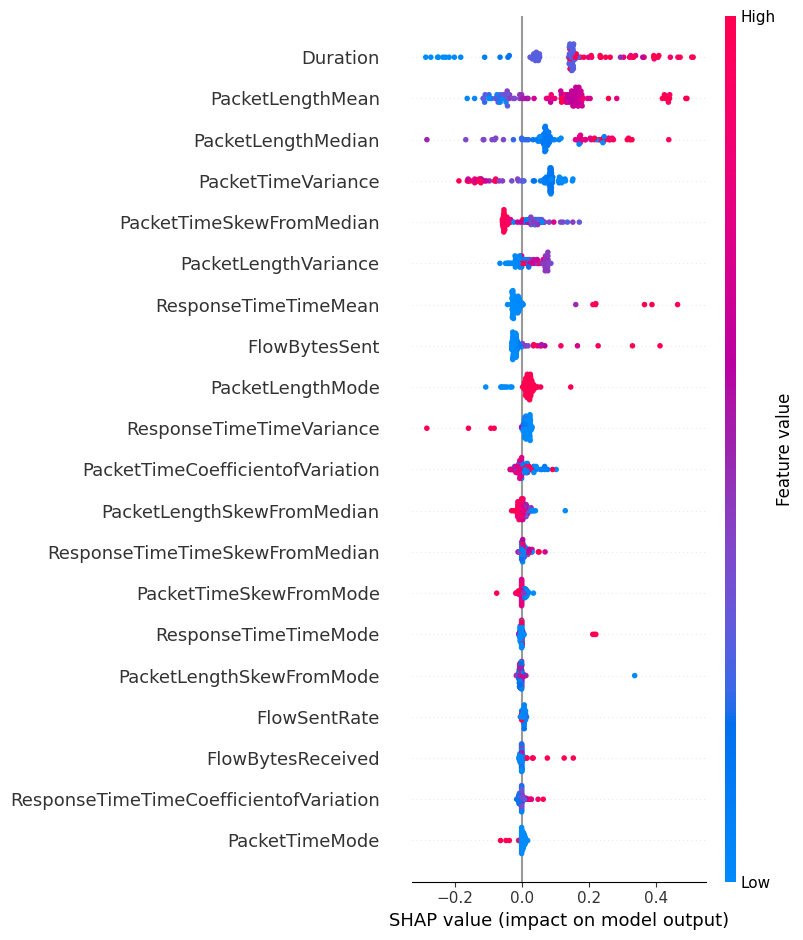

In [3]:
# If "True" debug messages will be printed
DEBUG = True
separator = "-------------------------------"

# The name from which the dataset will be loaded
filename = "l2-total.csv"

# Define the threshold used for dropping correlated features
CORRELATION_THRESHOLD = 0.9
# Define the percentage of the testing set compared to the total dataset size
TEST_SET_PERCENTAGE = 0.2

# Define the size of SHAP background dataset
K_MEANS_CLUSTERS = 50
SHAP_SAMPLING_POINTS = 100

# Imported libraries
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Input, Dropout
from tensorflow.keras import callbacks
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def debug(message, value = None, split = None):
    if DEBUG == True:
        if split == None:
            print(message)
        elif split == "No":
            print(message, value)
        elif split == "Yes":
            print(message)
            print(value)
    print(separator)
    return None

def load_dataset(filename):
    # Load the dataset from a csv file
    df = pd.read_csv(filename)

    # Drop NaN values
    df = df.dropna()

    # Return a dataframe
    return df

def drop_unwanted_features(df):
    dropped_features = ["SourceIP", "DestinationIP", "SourcePort", "DestinationPort", "TimeStamp"]
    df_reduced = df.drop(labels = dropped_features, axis = 1)
    features = df_reduced.columns.tolist()[0:-1]
    return df_reduced, features

def drop_features_by_correlation(df):
    # Calculate correlation coefficients for pairs of features
    df_for_corr = df.drop(labels = ['Label'], axis = 1)
    correlation_coeffs = df_for_corr.corr()

    # Keep the upper triangular matrix of correlation coefficients
    upper_tri = correlation_coeffs.where(np.triu(np.ones(correlation_coeffs.shape), k = 1).astype(np.bool))

    # Drop columns with high correlation (one of the features consisting the pair is dropped, the other is kept)
    to_drop = [column for column in upper_tri.columns if any(abs(upper_tri[column]) >= CORRELATION_THRESHOLD)]

    debug("Correlation threshold is: ", CORRELATION_THRESHOLD, "No")
    debug("Dropped features because of correlation: ", str(to_drop), "Yes")

    df = df.drop(columns = to_drop, inplace = False)
    features = df.columns.tolist()[0:-1]

    # Return the names of the dropped features, the new dataframe and the names of the new features within the feature set
    return df, features

def split_dataset(df):
    # Split the dataset into training and testing sets
    train_set, test_set = train_test_split(df, test_size = TEST_SET_PERCENTAGE, random_state = 2345, shuffle = True)

    # Split features from labels (the last three columns are domain name, binary label, malware family)
    X_train = train_set.iloc[:, :-1]
    y_train = train_set.iloc[:, -1]
    X_test = test_set.iloc[:, :-1]
    y_test = test_set.iloc[:, -1]

    return X_train, y_train, X_test, y_test

def scale_dataset(X_train, X_test):
    # Scale the dataset using min-max scaling
    minimum = X_train.min()
    maximum = X_train.max()
    X_train = (X_train - minimum) / (maximum - minimum)
    X_test = (X_test - minimum) / (maximum - minimum)

    # Return the scaled training and testing datasets
    return X_train, X_test

def oversample_data(X_train, y_train):
    # Oversample the data using SMOTE
    sm = SMOTE(random_state = 42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    return X_train, y_train

def keep_malicious(X_test, y_test):
    test_merged = pd.merge(left = X_test, left_index = True, right = y_test, right_index = True, how = 'inner')
    malicious_samples = test_merged[test_merged.iloc[:, -1] == 1].iloc[:, :-1]
    debug("After joining X_test and y_test, we get: ", test_merged, "Yes")
    debug("After keeping only malicious sampling points, we get: ", malicious_samples, "Yes")
    malicious_samples = malicious_samples[0:SHAP_SAMPLING_POINTS]
    debug("Will only test SHAP for: ", SHAP_SAMPLING_POINTS, "No")
    debug("Keeping only SHAP_SAMPLING_POINTS: ", malicious_samples, "Yes")
    return malicious_samples

def train_model(X_train, y_train, algorithm):
    rng = np.random.RandomState(42)
    debug("Training: ", algorithm, "No")
    if algorithm == "XGBoost":
        model = xgb.XGBClassifier(n_estimators = 15, max_depth = 10, random_state = rng)
        model.fit(X_train.values, y_train.values.ravel())
    elif algorithm == "RandomForest":
        model = RandomForestClassifier(n_estimators = 15, max_depth = 10, random_state = rng)
        model.fit(X_train.values, y_train.values.ravel())
    elif algorithm == "AdaBoost":
        model = AdaBoostClassifier(n_estimators = 15, random_state = rng)
        model.fit(X_train.values, y_train.values.ravel())
    elif algorithm == "ExtraTrees":
        model = ExtraTreesClassifier(n_estimators = 15, random_state = rng)
        model.fit(X_train.values, y_train.values.ravel())
    elif algorithm == "MLP":
        model = tf.keras.models.Sequential()
        early_stopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
        features_number = len(X_train.columns)
        model.add(tf.keras.layers.Dense(100, input_dim = features_number, activation = 'relu'))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(50, activation = 'relu'))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(50, activation = 'relu'))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
        model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        history = model.fit(X_train.values, y_train.values.ravel(), validation_split = 0.2, epochs = 3, batch_size = 128, callbacks = [early_stopping])

    return model

def evaluate_model(model, X_test, y_test, algorithm):
    # Make predictions on the testing dataset
    algorithms = ["RandomForest", "XGBoost", "AdaBoost", "ExtraTrees", "GradientBoosting"]
    if algorithm in algorithms:
        predictions = model.predict(X_test.values)

        # Print the different testing metrics
        print("Algorithm: ", str(algorithm))
        print("Accuracy: ", accuracy_score(y_test.values, predictions, normalize = True))
        print("Precision None: ", precision_score(y_test.values, predictions, average = None))
        print("Recall None: ", recall_score(y_test.values, predictions, average = None))
        print("F1 score None: ", f1_score(y_test.values, predictions, average = None))
        print(separator)

    return None

def evaluate_mlp(model, X_test, y_test, algorithm):
    # Make predictions on the testing dataset
    if algorithm == "MLP":
        debug("Training MLP classifier")
        # Print a summary of the MLP architecture
        print(model.summary())
        print(separator)
        score = model.evaluate(X_test.values, y_test.values, verbose = 1)
        print("MLP Accuracy:", score[1])
        print(separator)

    return None


def explain_with_summary_plots(model, shap_values, testing, algorithm):
    print("Summary Plots for: ", algorithm)
    fig = plt.clf()
    shap.summary_plot(shap_values, testing, show = True)
    return None

if __name__ == "__main__":
    # Load the dataset
    debug("Load dataset from file: ", filename, "No")
    df = load_dataset(filename)
    debug("The loaded dataset is the following: ", df, "Yes")

    # Drop unwanted features
    df_2, features = drop_unwanted_features(df)
    debug("After dropping unwanted features")
    debug("The new dataset is: ", df_2, "Yes")
    debug("The new features are: ", features, "Yes")
    
    # Drop correlated features
    df_3, features = drop_features_by_correlation(df_2)
    debug("After correlation, the new dataframe is: ", df_3, "Yes")
    debug("After correlation, the shape of the dataframe is: ", df_3.shape, "No")
    debug("After correlation, the names of the features are: ", features, "Yes")

    # Split dataset into training and testing portions
    X_train, y_train, X_test, y_test = split_dataset(df_3)
    debug("Unscaled X_train: ", X_train, "Yes")
    debug("y_train: ", y_train, "Yes")
    debug("Unscaled X_test: ", X_test, "Yes")
    debug("y_test: ", y_test, "Yes")

    debug("Size of X_train: ", len(X_train), "No")
    debug("Size of y_train: ", len(y_train), "No")
    debug("Size of X_test: ", len(X_test), "No")
    debug("Size of y_test: ", len(y_test), "No")

    # Scale dataset using min-max scaling
    X_train, X_test = scale_dataset(X_train, X_test)
    debug("After scaling dataset")
    debug("Scaled X_train: ", X_train, "Yes")
    debug("Scaled X_test: ", X_test, "Yes")

    # Data oversampling to deal with class imbalance
    X_train, y_train = oversample_data(X_train, y_train)
    debug("After oversampling")
    debug("Size of oversampled X_train: ", len(X_train), "No")
    debug("Size of oversampled y_train: ", len(y_train), "No")

    # Determine SHAP background dataset using K-Means clustering
    debug("Clusters selected for SHAP using K-Means: ", K_MEANS_CLUSTERS, "No")
    background = shap.kmeans(X_train, K_MEANS_CLUSTERS)

    # Keep only malicious sampling points from the test set
    malicious_testing = keep_malicious(X_test, y_test)

    # Train machine learning models
    #algorithms = ["RandomForest", "XGBoost", "AdaBoost", "ExtraTrees"]
    # NOT FOR THE REPORT!!!!!
    # Three more algorithms are also supported if you want to experiment with them (they are not covered in the course)
    algorithms = ["RandomForest"]
    for algorithm in algorithms:
        model = train_model(X_train, y_train, algorithm)
        evaluate_model(model, X_test, y_test, algorithm)
        model_explainer = shap.KernelExplainer(model.predict, background)
        shap_values = model_explainer.shap_values(malicious_testing)
        explain_with_summary_plots(model, shap_values, malicious_testing, algorithm)

    algorithms = ["MLP"]
    for algorithm in algorithms:
        model = train_model(X_train, y_train, algorithm)
        evaluate_mlp(model, X_test, y_test, algorithm)
        model_explainer = shap.KernelExplainer(model.predict, background)
        shap_values = model_explainer.shap_values(malicious_testing)
        shap_values = np.asarray(shap_values)
        shap_values = shap_values[0]
        explain_with_summary_plots(model, shap_values, malicious_testing, algorithm)


<h2><b>Ερωτήσεις</b></h2>
<ul>
<li> Κοιτώντας τον κώδικα, περιγράψτε συνοπτικά τα βήματα που γίνονται στο preprocessing του dataset.</li>
<li> Καταγράψτε τα αποτελέσματα που αφορούν τις μετρικές αξιολόγησης των μοντέλων μηχανικής μάθησης που χρησιμοποιήθηκαν στο πρόγραμμα.</li>
<li> Περιγράψτε συνοπτικά πώς δουλεύει η μέθοδος SHAP.</li>
<li> Πότε χρησιμοποιείται η μέθοδος SHAP; Πριν, κατά τη διάρκεια ή μετά από την εκπαίδευση των μοντέλων μηχανικής μάθησης; Δικαιολογήστε.</li>
<li> Τι σημαίνει ότι η SHAP είναι μία model-agnostic μέθοδος; Πού φαίνεται αυτό στην άσκηση;</li>
<li> Τα διαγράμματα που εκτυπώνονται ονομάζονται SHAP summary plots. Περιγράψτε τον τρόπο με τον οποίο ερμηνεύονται τα summary plots. (Υπόδειξη: <a href="https://christophm.github.io/interpretable-ml-book/shap.html">εδώ</a>)</li>
<li>Περιγράψτε σύντομα τον τρόπο με τον οποίο λειτουργεί κάθε μοντέλο (ποια είναι τα πιο σημαντικά features, τι συμβαίνει για μεγάλες και μικρές τιμές τους).</li>
<li> Ποιος είναι ο σκοπός των μεταβλητών K_MEANS_CLUSTERS και SHAP_SAMPLING_POINTS; (Υπόδειξη: <a href="https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html">εδώ</a>)</li>
<li> Αυξήστε τις παραπάνω μεταβλητές σε 100 και 1000 αντίστοιχα. Τι παρατηρείτε σχετικά με τον χρόνο εκτέλεσης της μεθόδου SHAP; (Δε χρειάζεται να καταγράψετε τα νέα διαγράμματα).
</ul>

